In [1]:
from pathlib import Path

import pandas as pd
import simuran
from simuran.loaders import nwb_loader

In [2]:
data_path = Path(r"D:\atn-sub-lfp-workflow\results")
nwb_file_csv_path = data_path / "every_processed_nwb.csv"

In [3]:
recording_table = pd.read_csv(nwb_file_csv_path)
recordings = simuran.RecordingContainer.from_table(recording_table, nwb_loader.NWBLoader())
recordings

RecordingContainer(load_on_fly=True, last_loaded=Recording(attrs={}, datetime=datetime.datetime(2023, 2, 17, 13, 7, 28, 703582), tag=None, loader=None, source_file=None, last_loaded_source=<object object at 0x0000020FA1F10D60>, data=None, results={}, available_data=[]), attrs={}, invalid_recording_locations=[], table=                                              directory  \
0     H:\SubRet_recordings_imaging\CSR6\screening_sm...   
1     H:\SubRet_recordings_imaging\CSR6\screening_sm...   
2     H:\SubRet_recordings_imaging\CSR6\screening_sm...   
3     H:\SubRet_recordings_imaging\CSR6\screening_sm...   
4     H:\SubRet_recordings_imaging\CSR6\small  sq_bi...   
...                                                 ...   
2688  H:\SubRet_recordings_imaging\muscimol_data\Can...   
2689  H:\SubRet_recordings_imaging\muscimol_data\Can...   
2690  H:\SubRet_recordings_imaging\muscimol_data\Can...   
2691  H:\SubRet_recordings_imaging\muscimol_data\Can...   
2692  H:\SubRet_recordings_imagi

In [4]:
import os
os.chdir(r"D:\atn-sub-lfp-workflow")
recording = recordings.load(0)

In [5]:
simuran.inspect(recording)

╭───────────────────────────────────── <class 'simuran.recording.Recording'> ─────────────────────────────────────╮
│ Describe a full recording session and holds data.                                                               │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ Recording(                                                                                                  │ │
│ │ │   attrs={                                                                                                 │ │
│ │ │   │   'directory': 'H:\\SubRet_recordings_imaging\\CSR6\\screening_small sq\\2003201'+1,                  │ │
│ │ │   │   'filename': '20032018_CSR6_screening_small sq_8.set',                                               │ │
│ │ │   │   'duration': 900.0,                                                                                  │ │
│ │ │   │   'rat': 'CSR6',                                                                                      │ │
│ │ │   │   'n_channels': 32,                                                                                   │ │
│ │ │   │   'sleep': 0.0,                                                                                       │ │
│ │ │   │   'maze': 'small_sq',                                                                                 │ │
│ │ │   │   'habituation_screening': 1.0,                                                                       │ │
│ │ │   │   'treatment': 'Control',                                                                             │ │
│ │ │   │   'light': nan,                                                                                       │ │
│ │ │   │   ... +18                                                                                             │ │
│ │ │   },                                                                                                      │ │
│ │ │   datetime=datetime.datetime(2023, 2, 17, 13, 7, 28, 704581),                                             │ │
│ │ │   tag=None,                                                                                               │ │
│ │ │   loader=NWBLoader(mode='r'),                                                                             │ │
│ │ │   source_file='results\\processed\\CSR6--screening_small sq--20032018--200320'+32,                        │ │
│ │ │   last_loaded_source='results\\processed\\CSR6--screening_small sq--20032018--200320'+32,                 │ │
│ │ │   data=root pynwb.file.NWBFile at 0x2266357849296                                                         │ │
│ │ Fields:                                                                                                     │ │
│ │   devices: {                                                                                                │ │
│ │ │   Bipolar electrodes 75um thick <class 'pynwb.device.Device'>,                                            │ │
│ │ │   Platinum-iridium wires 25um thick <class 'pynwb.device.Device'>                                         │ │
│ │   }                                                                                                         │ │
│ │   electrode_groups: {                                                                                       │ │
│ │ │   BE0 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   BE1 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT0 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT1 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT2 <class 'pynwb.ecephys.ElectrodeGroup'>,     

In [6]:
from pynwb import NWBHDF5IO
high_rate_ecephys = recording.data.processing.pop("high_rate_ecephys")
recording.data.set_modified()  # this may be necessary if the modifications are changes to attributes

In [7]:
print(high_rate_ecephys["LFP"]["ElectricalSeries"])
print(recording.attrs["duration"])
print(high_rate_ecephys["LFP"]["ElectricalSeries"].data.shape[0] / recording.attrs["duration"])

ElectricalSeries pynwb.ecephys.ElectricalSeries at 0x2266357487696
Fields:
  comments: no comments
  conversion: 0.001
  data: <HDF5 dataset "data": shape (4320000, 32), type "<f8">
  description: no description
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  filtering: Notch filter at 50Hz
  offset: 0.0
  rate: 4800.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

900.0
4800.0


In [19]:
recording.data.processing.pop("high_rate_ecephys_new")

high_rate_ecephys_new pynwb.base.ProcessingModule at 0x2266385733472
Fields:
  data_interfaces: {
    LFP <class 'pynwb.ecephys.LFP'>
  }
  description: High sampling rate extracellular electrophysiology data

In [20]:
import logging
import os
from pathlib import Path

import numpy as np
import pandas as pd
import simuran as smr
from hdmf.backends.hdf5.h5_utils import H5DataIO
from hdmf.common import DynamicTable
from neurochat.nc_lfp import NLfp
from neurochat.nc_spike import NSpike
from neurochat.nc_utils import RecPos
from pynwb import NWBHDF5IO, NWBFile, TimeSeries
from pynwb.behavior import CompassDirection, Position, SpatialSeries
from pynwb.ecephys import LFP, ElectricalSeries
from pynwb.file import Subject
from skm_pyutils.table import df_from_file, df_to_file, filter_table, list_to_df
from scipy.signal import decimate


def add_lfp_array_to_nwb(
    nwbfile,
    num_electrodes,
    lfp_data,
    module=None,
    conversion=0.001,
    rate=250.0,
):
    all_table_region = nwbfile.create_electrode_table_region(
        region=list(range(num_electrodes)), description="all electrodes"
    )

    compressed_data = H5DataIO(data=lfp_data, compression="gzip", compression_opts=9)
    lfp_electrical_series = ElectricalSeries(
        name="ElectricalSeries",
        data=compressed_data,
        electrodes=all_table_region,
        starting_time=0.0,
        rate=rate,
        conversion=conversion,
        filtering="Notch filter at 50Hz",
    )
    lfp = LFP(electrical_series=lfp_electrical_series)

    if module is None:
        module = nwbfile.create_processing_module(
            name="ecephys", description="Processed extracellular electrophysiology data"
        )
    module.add(lfp)

module = recording.data.create_processing_module(
    name="high_rate_ecephys_new",
    description="High sampling rate extracellular electrophysiology data",
)
add_lfp_array_to_nwb(
    recording.data,
    32,
    decimate(high_rate_ecephys["LFP"]["ElectricalSeries"].data[:], 3, axis=0).astype(np.float16),
    rate=1600.0,
    module=module,
)

In [21]:
print(recording.data.processing["high_rate_ecephys_new"]["LFP"]["ElectricalSeries"])
print(recording.attrs["duration"])
print(recording.data.processing["high_rate_ecephys_new"]["LFP"]["ElectricalSeries"].data.shape[0] / recording.attrs["duration"])

ElectricalSeries pynwb.ecephys.ElectricalSeries at 0x2266357849152
Fields:
  comments: no comments
  conversion: 0.001
  data: <hdmf.backends.hdf5.h5_utils.H5DataIO object at 0x0000020FB52513D0>
  description: no description
  electrodes: electrodes <class 'hdmf.common.table.DynamicTableRegion'>
  filtering: Notch filter at 50Hz
  offset: 0.0
  rate: 1600.0
  resolution: -1.0
  starting_time: 0.0
  starting_time_unit: seconds
  unit: volts

900.0
4800.0


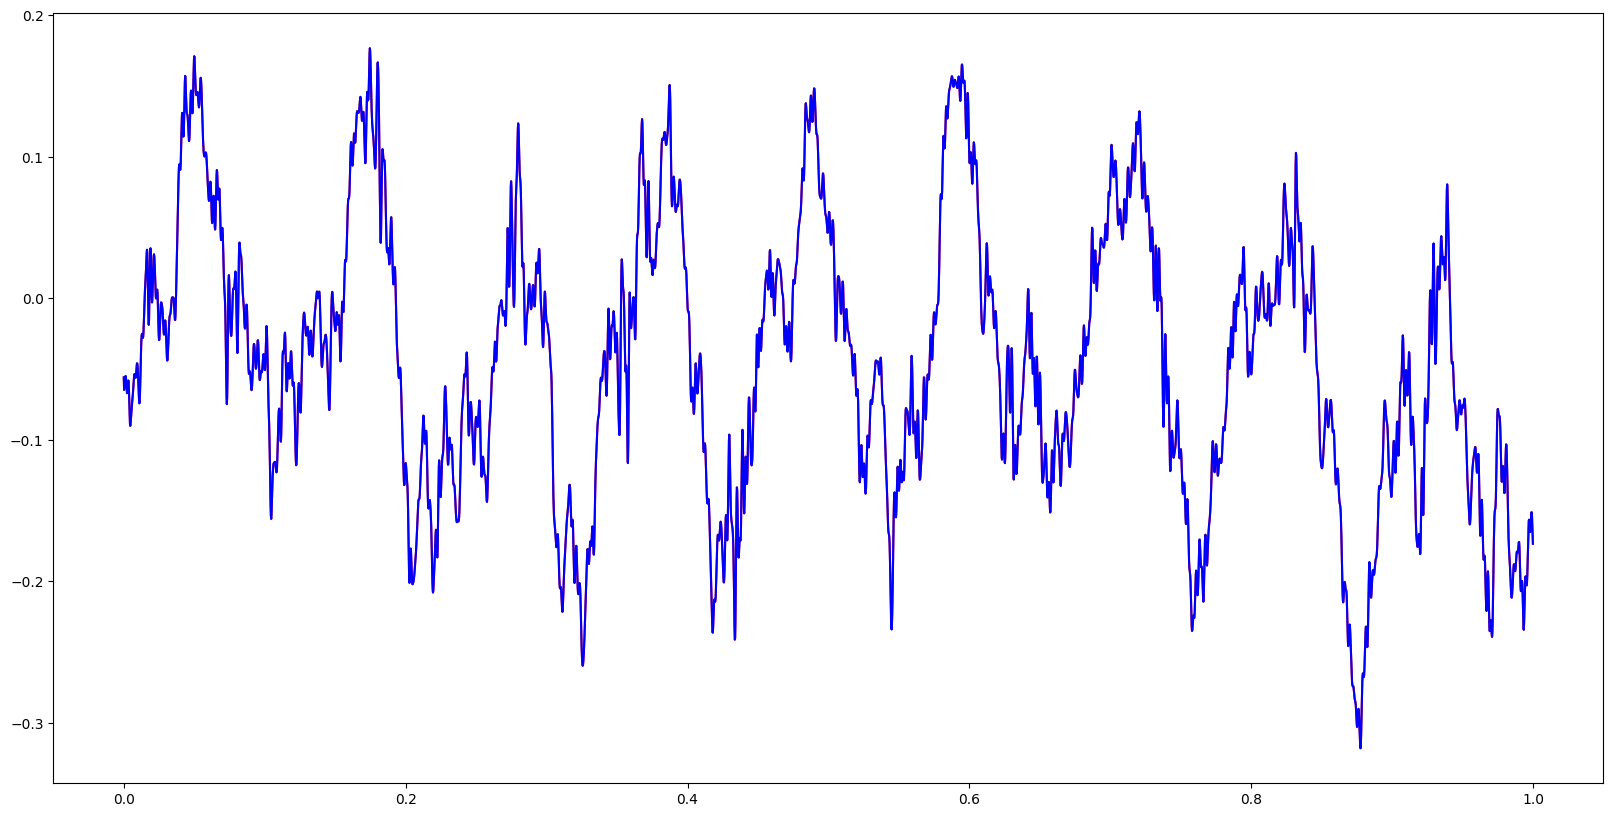

In [25]:
import matplotlib.pyplot as plt
fig, axes = plt.subplots(1, 1, figsize=(20, 10))
x1 = [i * 1 / 4800 for i in range(4800)]
x2 = [i * 1 / 4800 for i in range(4800)]
axes.plot(x1, high_rate_ecephys["LFP"]["ElectricalSeries"].data[:4800, 0], c="r")
axes.plot(x2, recording.data.processing["high_rate_ecephys_new"]["LFP"]["ElectricalSeries"].data[:4800, 0], c="b")
plt.show()
plt.close(fig)

In [23]:
# low_rate_ecephys = recording.data.processing["ecephys"]

KeyError: 'ecephys'

In [ ]:
# low_rate_ecephys

ecephys pynwb.base.ProcessingModule at 0x2266356831136
Fields:
  data_interfaces: {
    LFP <class 'pynwb.ecephys.LFP'>
  }
  description: Processed extracellular electrophysiology data

In [ ]:
# recording.data.processing.pop("ecephys")

ecephys pynwb.base.ProcessingModule at 0x2266356831136
Fields:
  data_interfaces: {
    LFP <class 'pynwb.ecephys.LFP'>
  }
  description: Processed extracellular electrophysiology data

In [24]:
export_path = "test.nwb"
with NWBHDF5IO(export_path, mode='w') as export_io:
    export_io.export(src_io=recording._nwb_io, nwbfile=recording.data)

In [ ]:
simuran.inspect(recording.data)

╭───────────────────────────────────────── <class 'pynwb.file.NWBFile'> ──────────────────────────────────────────╮
│ A representation of an NWB file.                                                                                │
│                                                                                                                 │
│ ╭─────────────────────────────────────────────────────────────────────────────────────────────────────────────╮ │
│ │ root pynwb.file.NWBFile at 0x2266357849296                                                                  │ │
│ │ Fields:                                                                                                     │ │
│ │   devices: {                                                                                                │ │
│ │ │   Bipolar electrodes 75um thick <class 'pynwb.device.Device'>,                                            │ │
│ │ │   Platinum-iridium wires 25um thick <class 'pynwb.device.Device'>                                         │ │
│ │   }                                                                                                         │ │
│ │   electrode_groups: {                                                                                       │ │
│ │ │   BE0 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   BE1 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT0 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT1 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT2 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT3 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT4 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT5 <class 'pynwb.ecephys.ElectrodeGroup'>,                                                             │ │
│ │ │   TT6 <class 'pynwb.ecephys.ElectrodeGroup'>                                                              │ │
│ │   }                                                                                                         │ │
│ │   electrodes: electrodes <class 'hdmf.common.table.DynamicTable'>                                           │ │
│ │   experiment_description: Relationship between ATN, SUB, RSC, and CA1                                       │ │
│ │   experimenter: ['Bethany Frost']                                                                           │ │
│ │   file_create_date: [datetime.datetime(2022, 10, 27, 15, 6, 4, 883399, tzinfo=tzoffset(None, 3600))]        │ │
│ │   identifier: ATNx_SUB_LFP--CSR6--screening_small sq--20032018--20032018_CSR6_screening_small sq_8          │ │
│ │   institution: TCD                                                                                          │ │
│ │   lab: O'Mara lab                                                                                           │ │
│ │   processing: {                                                                                             │ │
│ │ │   average_lfp <class 'pynwb.base.ProcessingModule'>,                                                      │ │
│ │ │   behavior <class 'pynwb.base.ProcessingModule'>,                                                         │ │
│ │ │   high_rate_ecephys_new <class 'pynwb.base.ProcessingModule'>,                                            │ │
│ │ │   lfp_coherence <class 'pynwb.base.ProcessingModule'>,                                                    │ │
│ │ │   lfp_power <class 'pynwb.base.ProcessingModule'>,                                                        │ │
│ │ │   normalised_lfp <class 'pynwb.base.ProcessingModu